This exercise only requires `numpy` and `matplotlib`.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

We choose `nc` which is the number of centroids. We then randomly generate data to be in three areas of the x-y space. The last line (concatenating the data with zeros) is to create a column where we can assign a centroid/color.

In [ ]:
nc = 3
dat1 = 2*np.random.rand(25,2) + 6
dat1[:,0] -= 3
dat2 = 2*np.random.rand(25,2) + 1
dat3 = np.random.rand(25,2) + 3
dat3[:,0] += 4
dat = np.concatenate((dat1,dat2,dat3),axis=0)
dat = np.concatenate((dat,np.zeros(shape=(dat.shape[0],1))),axis=1)

Next, we choose three centroid locations. I have them fixed to be in the middle. You can change which line is commented to generate random initial centroid locations.

In [ ]:
#cent = 5*np.random.rand(nc,2) + 2
cent = np.array([[4,4],[4,4.5],[3.9,4.4]])

Let's plot the data and current centroids. You'll see the three distinct groupings and can probably tell where the three centroids will end up. Through the K-means iterations, the samples will be assigned to the closest centroid and the color will show that.

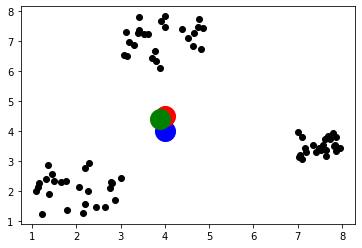

In [ ]:
fig,ax=plt.subplots()
plt.scatter(dat[:,0],dat[:,1],color='black')
plt.scatter(cent[0,0],cent[0,1],color='blue',s=400)
plt.scatter(cent[1,0],cent[1,1],color='red',s=400)
plt.scatter(cent[2,0],cent[2,1],color='green',s=400)

This is the complicated part. This is the definition of the K-means function which will iterate until there is no change in classification of all samples. I have commented through the function to help the understanding.

In [ ]:
def k_means(dat,cent,nc):
    # any sample with the last column of 0, 1, or 2 is associated with the 1st, 2nd, or 3rd centroid, respectively
    c1 = dat[dat[:,2]==0,:2]
    c2 = dat[dat[:,2]==1,:2]
    c3 = dat[dat[:,2]==2,:2]
    # initialize the condition for the while loop and start the iteration counter
    k = 2
    counter = 0
    while k > 0:
        orig = dat[:,2] # this determines the initial "classification" of each sample
        # the next 5 lines compute the distance of each sample to all centroids then finds the closest centroid for each sample
        for i in range(dat.shape[0]):
            dist = np.zeros(nc)
            for j in range(nc):
                dist[j] = np.sqrt(np.sum(np.power(dat[i,:2]-cent[j,:],2)))
            dat[i,2] = np.argmin(dist)
        # next we are assigning each sample a label according to its closest centroid
        c1 = dat[dat[:,2]==0,:2]
        c2 = dat[dat[:,2]==1,:2]
        c3 = dat[dat[:,2]==2,:2]
        # move the centroids closer to the samples assigned to it
        if c1.shape[0] != 0:
            cent[0,0] -= np.sum(cent[0,0]-c1[:,0])/c1.shape[0]
            cent[0,1] -= np.sum(cent[0,1]-c1[:,1])/c1.shape[0]
        if c2.shape[0] != 0:
            cent[1,0] -= np.sum(cent[1,0]-c2[:,0])/c2.shape[0]
            cent[1,1] -= np.sum(cent[1,1]-c2[:,1])/c2.shape[0]
        if c3.shape[0] != 0:
            cent[2,0] -= np.sum(cent[2,0]-c3[:,0])/c3.shape[0]
            cent[2,1] -= np.sum(cent[2,1]-c3[:,1])/c3.shape[0]
        # recompute distances with updated centroid locations
        new = np.zeros(len(orig))
        for i in range(dat.shape[0]):
            dist = np.zeros(nc)
            for j in range(nc):
                dist[j] = np.sqrt(np.sum(np.power(dat[i,:2]-cent[j,:],2)))
            new[i] = np.argmin(dist)
        # find out how many samples changed their assignment
        k = np.sum(np.abs(orig-new))
    return c1,c2,c3,cent

Run the `k_means` function.

In [ ]:
c1,c2,c3,cent = k_means(dat,cent,nc)

Plot final results.

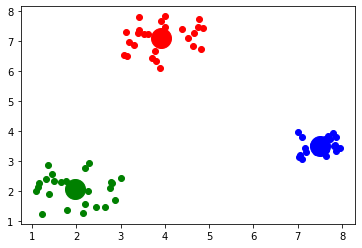

In [ ]:
fig,ax=plt.subplots()
plt.scatter(c1[:,0],c1[:,1],color='blue')
plt.scatter(c2[:,0],c2[:,1],color='red')
plt.scatter(c3[:,0],c3[:,1],color='green')
plt.scatter(cent[0,0],cent[0,1],color='blue',s=400)
plt.scatter(cent[1,0],cent[1,1],color='red',s=400)
plt.scatter(cent[2,0],cent[2,1],color='green',s=400)